📜Intermediate Test<BR>
모든 문제를 풀이가 가능한 라이브러리를 명시 해 드렸습니다.<BR>
하지만 다른 라이브러리로 문제를 해결하셔도 점수에 영향을 받지 않습니다

---
# Pandas + 크롤링 (20점)

- name_list 라는 html 파일에서 데이터 크롤링을 통해 원본 명단 1번 df를 만들어 줍니다.
- 📚libary :<font color='red'> Pandas, Selenium</font>
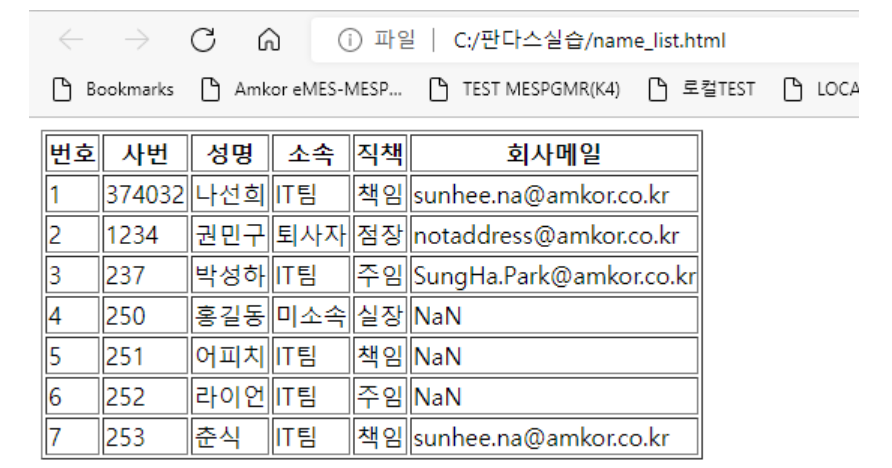

- 파싱 후 df는 아래와 같은 형태가 될 것으로 예상 됩니다.
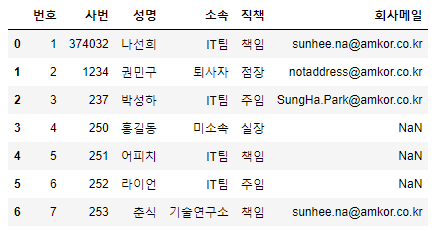

In [1]:
#########################################1번문제 code 작성 공간#########################################


In [9]:
!pip install bs4
import os
import re
import io
import time

from bs4 import BeautifulSoup

from webdriver_manager.chrome import ChromeDriverManager

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.remote.webelement import WebElement
from selenium.webdriver.common.by import By

import openpyxl
from openpyxl import Workbook
from openpyxl.styles import Font, Border, Side, Alignment, PatternFill, NamedStyle
from openpyxl.utils import get_column_letter

import pandas as pd
import fsspec
from pandas import ExcelWriter


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: C:\Users\21443\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [99]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("file:///C:/Users/21443/jupyter_notebook/IM_GRAPTH_VER02/DATA/name_list.html")
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
content = soup.get_text()

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\21443\.wdm\drivers\chromedriver\win32\103.0.5060.134\chromedriver.exe] found in cache
C:\Users\21443\AppData\Local\Temp\1\ipykernel_10088\972912186.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [100]:
content = soup.get_text()
content = content.split('\n')
while '' in content:
        content.remove('')
data = content

In [101]:
content

['번호',
 '사번',
 '성명',
 '소속',
 '직책',
 '회사메일',
 '1',
 '374032',
 '나선희',
 'IT팀',
 '책임',
 'sunhee.na@amkor.co.kr',
 '2',
 '1234',
 '권민구',
 '퇴사자',
 '점장',
 'notaddress@amkor.co.kr',
 '3',
 '237',
 '박성하',
 'IT팀',
 '주임',
 'SungHa.Park@amkor.co.kr',
 '4',
 '250',
 '홍길동',
 '미소속',
 '실장',
 'NaN',
 '5',
 '251',
 '어피치',
 'IT팀',
 '책임',
 'NaN',
 '6',
 '252',
 '라이언',
 'IT팀',
 '주임',
 'NaN',
 '7',
 '253',
 '춘식',
 'IT팀',
 '책임',
 'sunhee.na@amkor.co.kr']

In [102]:
len(data)

48

In [103]:
body_num= len(data)//6
data_list=[]
for i in range(body_num):
    globals()['body{}'.format(i)] = data[6*i:6*(i+1)]
    data_list.append(eval('body{}'.format(i)))

In [104]:
data_list

[['번호', '사번', '성명', '소속', '직책', '회사메일'],
 ['1', '374032', '나선희', 'IT팀', '책임', 'sunhee.na@amkor.co.kr'],
 ['2', '1234', '권민구', '퇴사자', '점장', 'notaddress@amkor.co.kr'],
 ['3', '237', '박성하', 'IT팀', '주임', 'SungHa.Park@amkor.co.kr'],
 ['4', '250', '홍길동', '미소속', '실장', 'NaN'],
 ['5', '251', '어피치', 'IT팀', '책임', 'NaN'],
 ['6', '252', '라이언', 'IT팀', '주임', 'NaN'],
 ['7', '253', '춘식', 'IT팀', '책임', 'sunhee.na@amkor.co.kr']]

In [105]:
temp = pd.DataFrame(data_list)
temp.columns = body0
temp

,번호,사번,성명,소속,직책,회사메일
0,번호,사번,성명,소속,직책,회사메일
1,1,374032,나선희,IT팀,책임,sunhee.na@amkor.co.kr
2,2,1234,권민구,퇴사자,점장,notaddress@amkor.co.kr
3,3,237,박성하,IT팀,주임,SungHa.Park@amkor.co.kr
4,4,250,홍길동,미소속,실장,NaN
5,5,251,어피치,IT팀,책임,NaN
6,6,252,라이언,IT팀,주임,NaN
7,7,253,춘식,IT팀,책임,sunhee.na@amkor.co.kr


In [106]:
body0

['번호', '사번', '성명', '소속', '직책', '회사메일']

In [107]:
df = temp.iloc[1:,:]
df.columns = body0
df

,번호,사번,성명,소속,직책,회사메일
1,1,374032,나선희,IT팀,책임,sunhee.na@amkor.co.kr
2,2,1234,권민구,퇴사자,점장,notaddress@amkor.co.kr
3,3,237,박성하,IT팀,주임,SungHa.Park@amkor.co.kr
4,4,250,홍길동,미소속,실장,NaN
5,5,251,어피치,IT팀,책임,NaN
6,6,252,라이언,IT팀,주임,NaN
7,7,253,춘식,IT팀,책임,sunhee.na@amkor.co.kr


---
# Pandas 다루기 1 (15점)

- 앞에서 구한 해당 DF에서 직책이 책임인 df을 구합니다
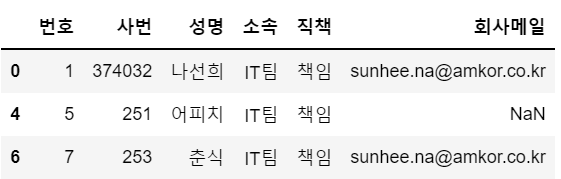

In [2]:
#########################################2번문제 code 작성 공간#########################################


In [92]:
df.loc[df['직책'].str.contains('책임')]

,번호,사번,성명,소속,직책,회사메일
1,1,374032,나선희,IT팀,책임,sunhee.na@amkor.co.kr
5,5,251,어피치,IT팀,책임,NaN
7,7,253,춘식,IT팀,책임,sunhee.na@amkor.co.kr


---
# Pandas 다루기 2 (15점)
- 1번, 2번 문제과정을 통해 얻어낸 DF에서 소속이 일치하는 입사정보파일.xls 의 데이터 LIST만을 구합니다.
- ✔ 좌 - 크롤링 DF, 우- 엑셀 에서 가져온 DF

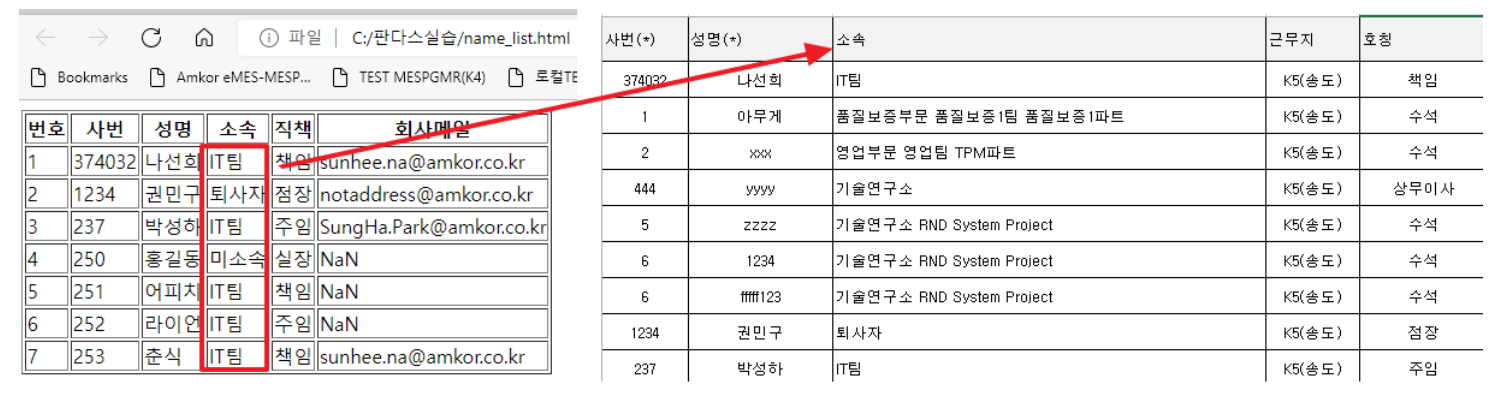

- 예상결과는 다음과 같습니다.
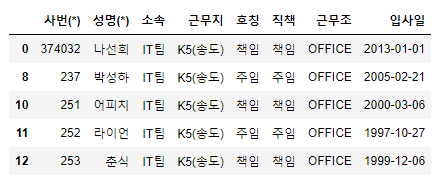

In [3]:
#########################################3번문제 code 작성 공간#########################################


In [108]:
df

,번호,사번,성명,소속,직책,회사메일
1,1,374032,나선희,IT팀,책임,sunhee.na@amkor.co.kr
2,2,1234,권민구,퇴사자,점장,notaddress@amkor.co.kr
3,3,237,박성하,IT팀,주임,SungHa.Park@amkor.co.kr
4,4,250,홍길동,미소속,실장,NaN
5,5,251,어피치,IT팀,책임,NaN
6,6,252,라이언,IT팀,주임,NaN
7,7,253,춘식,IT팀,책임,sunhee.na@amkor.co.kr


In [136]:
import pandas as pd

df1 = pd.read_excel('C:/Users/21443/jupyter_notebook/IM_GRAPTH_VER02/DATA/입사정보파일.xls')
df1

,사번(*),성명(*),소속,근무지,호칭,직책,근무조,입사일
0,374032,나선희,IT팀,K5(송도),책임,책임,OFFICE,2013-01-01
1,1,아무게,품질보증부문 품질보증1팀 품질보증1파트,K5(송도),수석,NaN,OFFICE,1999-12-13
2,2,xxx,영업부문 영업팀 TPM파트,K5(송도),수석,NaN,OFFICE,2005-02-21
3,444,yyyy,기술연구소,K5(송도),상무이사,기술연구소장,OFFICE,2016-06-01
4,5,zzzz,기술연구소,K5(송도),수석,Project Leader,OFFICE,2004-04-06
5,6,1234,기술연구소,K5(송도),수석,NaN,OFFICE,2000-12-11
6,6,fffff123,기술연구소,K5(송도),수석,NaN,OFFICE,2000-05-09
7,1234,권민구,퇴사자,K5(송도),점장,점장,OFFICE,1995-12-01
8,237,박성하,IT팀,K5(송도),주임,주임,OFFICE,2005-02-21
9,250,홍길동,미소속,K5(송도),실장,실장,OFFICE,2007-03-05


In [137]:
df.iloc[0,3]

'IT팀'

In [138]:
df1.loc[df1['소속'].str.contains(df.iloc[0,3])]

,사번(*),성명(*),소속,근무지,호칭,직책,근무조,입사일
0,374032,나선희,IT팀,K5(송도),책임,책임,OFFICE,2013-01-01
8,237,박성하,IT팀,K5(송도),주임,주임,OFFICE,2005-02-21
10,251,어피치,IT팀,K5(송도),책임,책임,OFFICE,2000-03-06
11,252,라이언,IT팀,K5(송도),주임,주임,OFFICE,1997-10-27
12,253,춘식,IT팀,K5(송도),책임,책임,OFFICE,1999-12-06


---
# Pandas 다루기 3 (15점)
- 이름, 근무지, 입사일 만을 DF로 새롭게 구성하여 생성합니다.
- 해당 데이터 프레임에서 입사일은 년도만(YYYY) 잘라냅니다.

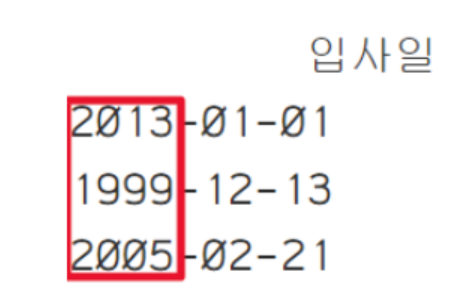

- 예상결과는 다음과 같습니다.
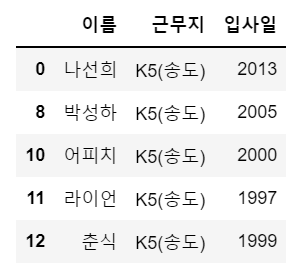

In [4]:
#########################################4번문제 code 작성 공간#########################################


In [140]:
df2 = df1.loc[df1['소속'].str.contains(df.iloc[0,3])]

In [141]:
del df2['사번(*)']
del df2['소속']
del df2['호칭']
del df2['직책']
del df2['근무조']

In [144]:
df2.columns = ['이름','근무지','입사일']
df2

,이름,근무지,입사일
0,나선희,K5(송도),2013-01-01
8,박성하,K5(송도),2005-02-21
10,어피치,K5(송도),2000-03-06
11,라이언,K5(송도),1997-10-27
12,춘식,K5(송도),1999-12-06


In [146]:
def split_year(value):
    return value.split('-')[0]

In [147]:
#apply 적용해서 새로운 열 만들기
df2['입사일'] = df2['입사일'].apply(split_year)
df2

C:\Users\21443\AppData\Local\Temp\1\ipykernel_10088\617747043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['입사일'] = df2['입사일'].apply(split_year)


,이름,근무지,입사일
0,나선희,K5(송도),2013
8,박성하,K5(송도),2005
10,어피치,K5(송도),2000
11,라이언,K5(송도),1997
12,춘식,K5(송도),1999


---
# Pandas 다루기 4 (15점)

- 해당 결과를 하나의 엑셀파일로 저장해봅시다.
- 엑셀 저장 시 파일명은 소속명_BasicTest 로 부탁드립니다.
- 예상결과는 다음과 같습니다.
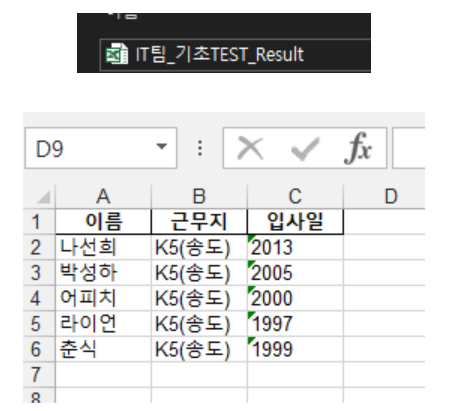

In [5]:
#########################################5번문제 code 작성 공간#########################################


In [152]:
df2

,이름,근무지,입사일
0,나선희,K5(송도),2013
8,박성하,K5(송도),2005
10,어피치,K5(송도),2000
11,라이언,K5(송도),1997
12,춘식,K5(송도),1999


In [154]:
df2.to_excel ('C:/Users/21443/jupyter_notebook/IM_GRAPTH_VER02/{}_기초TEST_Result.xlsx'.format(df.iloc[0,3]), index = False, header=True)

---
# DataFrame 그래프 만들기(5점)
1. IM_TEST01.csv 파일을 불러 옵니다.
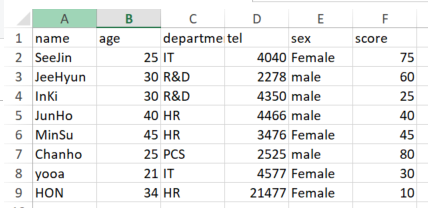

2. x 축 name y축 score로 scatter 그래프를 만들어 주세요.
3. 그래프 밖 배경은 whitegrid 옵션으로 변경 해 주세요.
4. title은 -  Amkor Score 으로 해 주세요.
<br>📚libary :<font color='red'> matplotlib,sns,pandas</font>
<br>

6. 예상결과

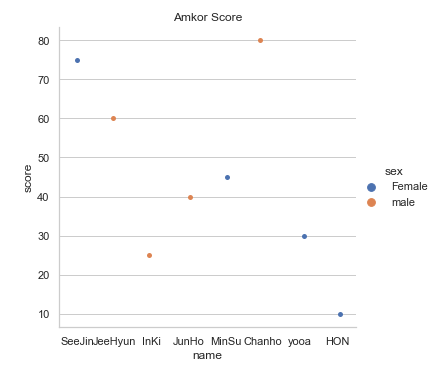

In [6]:
#########################################6번문제 code 작성 공간#########################################


In [158]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

import pandas as pd
import matplotlib.pyplot as plt

In [155]:
df3 = pd.read_csv('C:/Users/21443/jupyter_notebook/IM_GRAPTH_VER02/DATA/IM_TEST01.csv')
df3

,name,age,department,tel,sex,score
0,SeeJin,25,IT,4040,Female,75
1,JeeHyun,30,R&D,2278,male,60
2,InKi,30,R&D,4350,male,25
3,JunHo,40,HR,4466,male,40
4,MinSu,45,HR,3476,Female,45
5,Chanho,25,PCS,2525,male,80
6,yooa,21,IT,4577,Female,30
7,HON,34,HR,21477,Female,10


Text(0, 0.5, 'score')

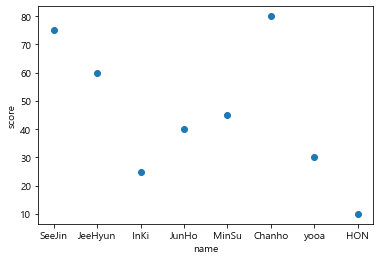

In [169]:
plt.scatter(df3['name'], df3['score'])
plt.xlabel('name')
plt.ylabel('score')

---
# DataFrame 그래프 만들기 2(15점)
1. 7번 엑셀 파일을 그대로 불러와 줍니다.
2. 불러온 엑셀 파일에서 연령대별 인원을 count 하여 DataFrame을 구해 줍니다.
3. 엑셀의 연령대는 20대 - 70대까지 존재 합니다.<BR>
이를 가변적으로 가져오기 위해선 어떤 작업이 필요 할까요? 만약 구현이 어려운 경우 10~70대를 hardcoding으로 만드셔도 됩니다.
<br><font color='red'>하지만 하드코딩의 경우 점수는 차감</font>
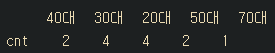
<font color='red'>hardcoding 예시 </font><br>
<font color='green'>ageDictionary = {'10대':0,'20대',:0,'30대',0....}</font>
4. 해당 count로 연령대 별 scatter 그래프를 구현 해 주세요.
5. 폰트 및 색상 은 7번 그래프와 동일한 옵션 사용 표시 . 닷의 color는 해당 색상 사용(빨강: #d9534f)
6. 그래프 배경 라인 처리 점선으로 처리linestyle='--' (가산점)
<br>📚libary :<font color='red'> matplotlib,pandas</font>
<br>📚함수 :<font color='red'> set, pd.DataFrame..</font>

- 예상되는 그래프 결과

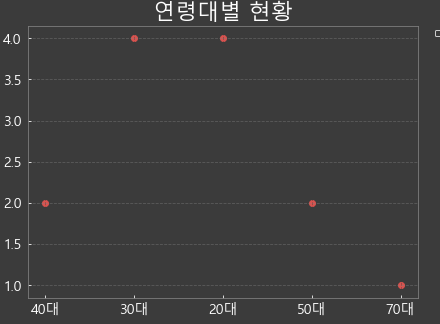

In [7]:
#########################################7번문제 code 작성 공간#########################################


In [163]:
df4 = pd.read_csv('C:/Users/21443/jupyter_notebook/IM_GRAPTH_VER02/DATA/employee_list_g.csv')
df4

,name,age,department,tel
0,SeeJin,25,IT,4040
1,JeeHyun,30,R&D,2278
2,InKi,30,R&D,4350
3,JunHo,40,HR,4466
4,MinSu,45,HR,3476
5,Chanho,25,PCS,2525
6,yooa,21,IT,4577
7,HON,34,HR,21477
8,2,50,HR,21478
9,3,52,IT,21479
